# California Housing dataset
Dataset can be fetched from Internet using scikit learn

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# Let's explore the data

In [4]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
missing_data = california_housing.frame.isnull().sum()
print(missing_data)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Data Contains 20640 samples with numerical values and no missong values.
Let's see the distributions of these features by plotting. 

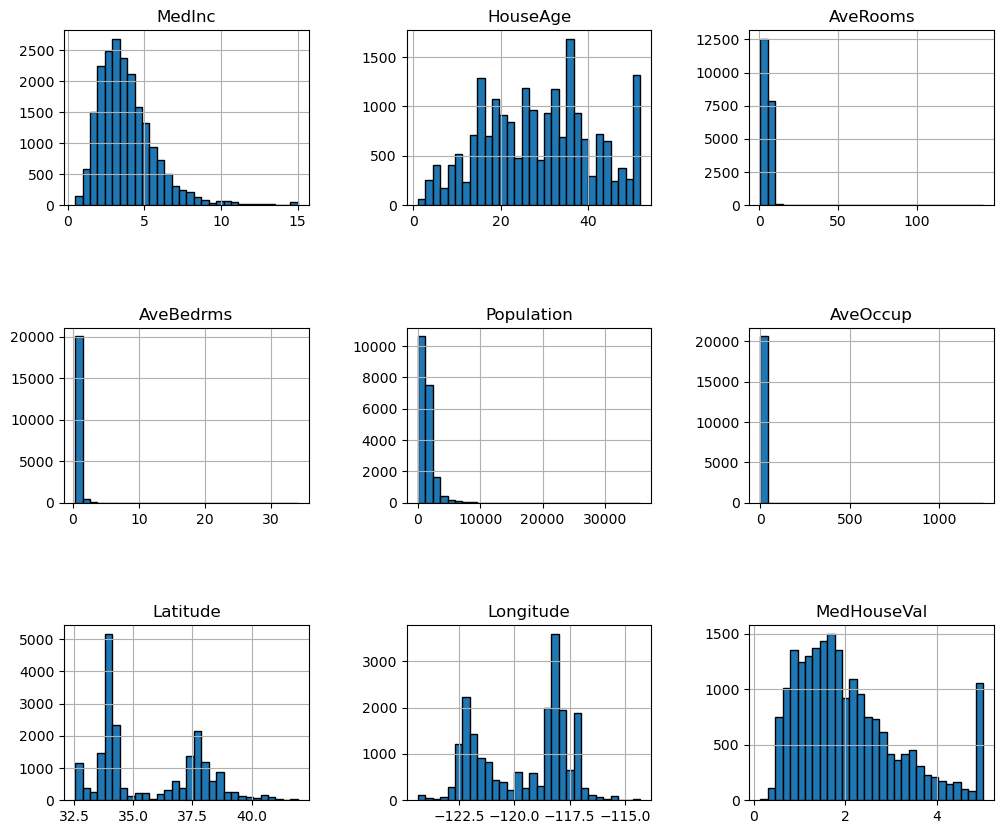

In [15]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


The median income distribution exhibits a long tail, indicating that while most incomes are somewhat normally distributed, there are a few individuals with significantly higher salaries. 

In contrast, the distribution of average house age is relatively uniform, suggesting that house ages are spread out evenly without clustering in any particular range.

The target variable also displays a long tail, with a notable threshold effect: any house priced above 5 is capped at a value of 5.

For features such as average rooms, average bedrooms, average occupancy, and population, the data spans a broad range, with few bins capturing the highest values. This suggests the presence of very high values that might be considered outliers. The statistical summaries for these features highlight this pattern.

In [10]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


Comparing the maximum values with the 75th percentile values reveals a substantial difference, which supports the observation that there are a few extreme outliers in the data.

We excluded the longitude and latitude columns, which contain geographical information. However, a scatter plot with latitude on the x-axis and longitude on the y-axis could be created to visualize the geographic distribution.

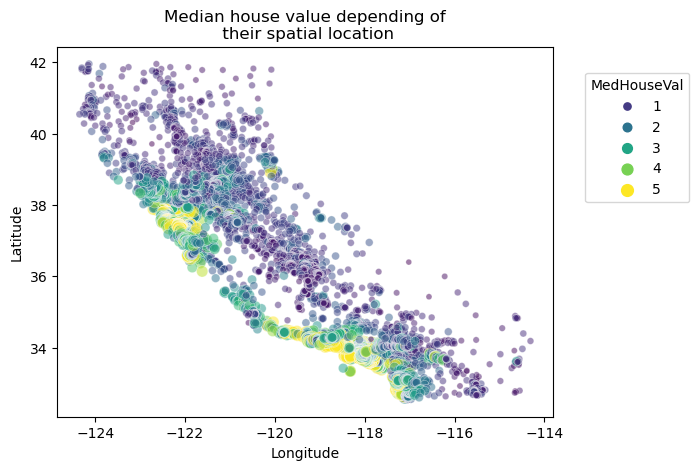

In [11]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We observe that high-value houses are generally situated along the coast, near major California cities such as San Diego, Los Angeles, San Jose, and San Francisco.

To better visualize these patterns, we can perform random subsampling to reduce the number of data points, while still preserving enough information to highlight these geographical trends.

In [12]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=500, replace=False
)

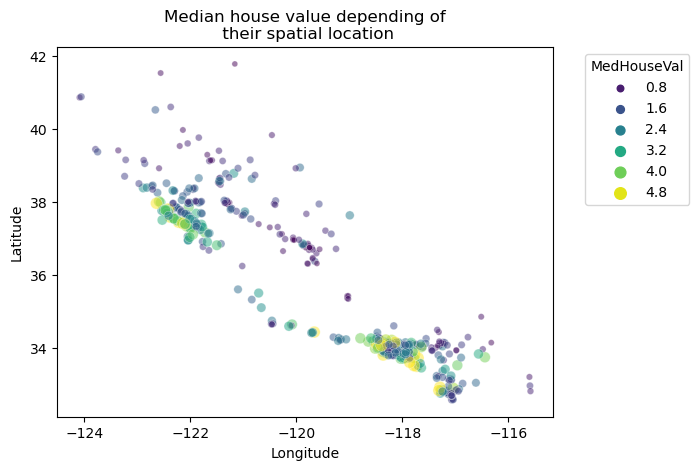

In [13]:
sns.scatterplot(
    data=california_housing.frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We will quantize the target variable to enable the creation of meaningful histograms.

In [14]:
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

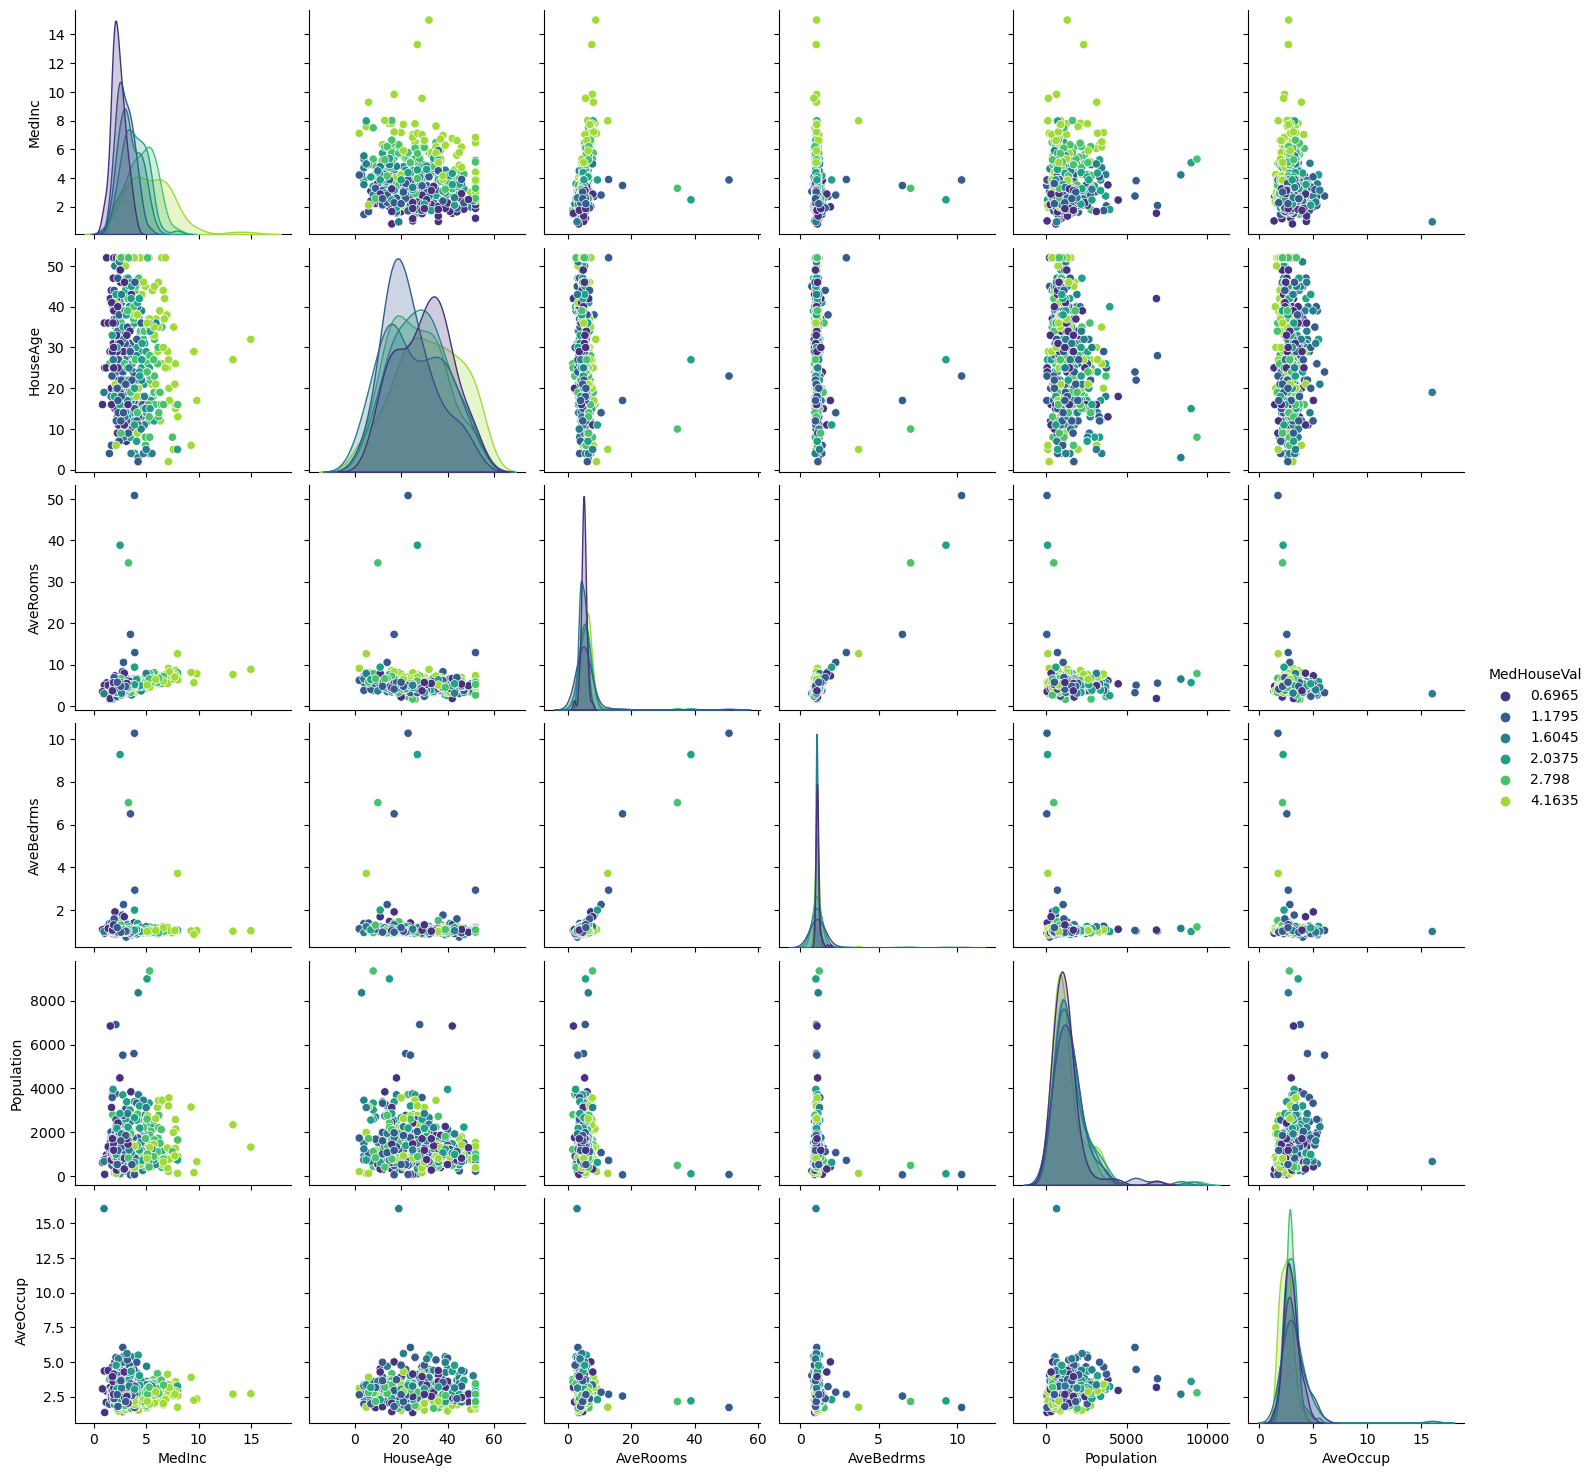

In [15]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

We’ve identified that some features have extreme values (possibly outliers) and that median income is effective for distinguishing between high- and low-valued houses. 

In building a predictive model, longitude, latitude, and median income are expected to be key features for predicting median house values. 

Below, we present a linear model and the coefficients obtained through cross-validation.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    california_housing.data,
    california_housing.target,
    return_estimator=True,
    n_jobs=2,
)

In [17]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


In [18]:
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names,
)

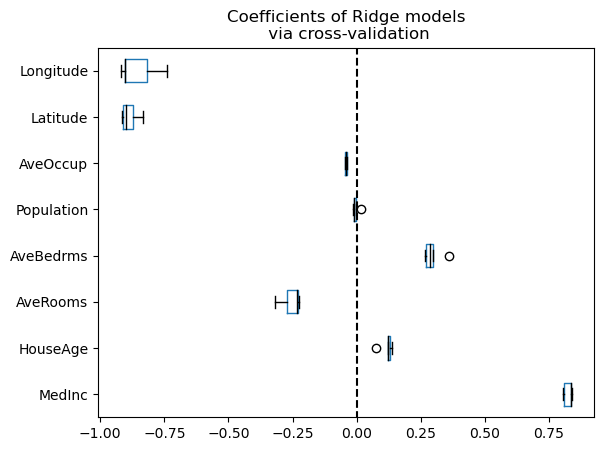

In [19]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")


It seems that the three features that we earlier spotted are found important by this model.